# Sprint 機械学習スクラッチ 線形回帰

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 問題1~3と5は下記class内に実装

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$$
hθ(x)=θ_0x_0+θ_1x_1+...+θj_xj+...+θ_nx_n.(x_0=1)
$$

$x$ : 特徴量ベクトル


$\theta$ : パラメータベクトル


$n$ : 特徴量の数


$x_j$ : j番目の特徴量


$\theta_j$ : j番目のパラメータ（重み）


特徴量の数$n$は任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。


$$
hθ(x)=θT⋅x
$$
雛形


クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$$
θj:=θj−
α
1
m
m
∑
i
=
1
 
[
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
x
(
i
)
j
]
$$

$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


雛形


ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力が推定結果です。


## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） 
J
(
θ
)
 は次の式です。


J
(
θ
)
=
1
2
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
.

m
 : 入力されるデータの数


h
θ
(
)
 : 仮定関数


x
(
i
)
 : i番目のサンプルの特徴量ベクトル


y
(
i
)
 : i番目のサンプルの正解値

In [2]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """

    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        # 訓練データ・学習データのインスタンス変数化
        self.X, self.y, self.X_val, self.y_val, self.theta = self._setting(X, y, X_val, y_val)
        
        for i in range(self.iter):
            self.linear_hypo = self._linear_hypothesis(self.X)    #仮定関数
            self.grad = self._gradient_descent(self.X, self.y)    #thetaの更新
            self.pred = self.predict(self.X)     #目的関数
            #print("[pred]", self.pred)
            
            self.loss[i] = self.loss_func(self.y)    #損失関数
            
            if X_val is not None and y_val is not None:
                self.val_pred = self.predict(self.X_val)
                self.val_loss[i] = self.val_loss_func(self.y_val)
                    
            if self.verbose:
                # verboseをTrueにした際は学習過程を出力
                print("iter{}:[loss]:{}".format(i, self.loss[i]))
                print("iter{}:[val_loss]:{}".format(i, self.val_loss[i]))    


    def _setting(self, X, y, X_val, y_val):
        """
        インスタンス変数の整形関数
        
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        #thetaはこの関数内で作成
        
        X_copy = np.copy(X)
        y_copy = np.copy(y)
        
        if X_val is not None and y_val is not None:
            X_val_copy = np.copy(X_val)
            y_val_copy = np.copy(y_val)
                
        #バイアス項ありの場合
        if self.no_bias == False:
            X_ones = np.ones(X.shape[0]).reshape(-1, 1)
            X_val_ones = np.ones(X_val.shape[0]).reshape(-1, 1)   #X0列目に1を追加
            X_copy = np.hstack((X_ones, X_copy))
            X_val_copy = np.hstack((X_val_ones, X_val_copy))    #X0列目に1を追加
            np.random.seed(0)
            theta = np.random.randn(X.shape[1] + 1)   
            return X_copy, y_copy, X_val_copy, y_val_copy, theta

        else:
            theta = np.random.randn(X.shape[1])
            return X_copy, y_copy, X_val_copy, y_val_copy, theta

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        self.hypo = np.dot(X, self.theta.T).reshape(-1, 1)

        return self.hypo

    def _gradient_descent(self, X, y, alpha=0.0001, error=0):
        """
        最急降下法

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ

        alpha：学習率

        Returns
        -------

        """
        grad = np.average(np.dot(X.T,(self.linear_hypo-y)), axis=1)
        self.theta -= alpha*grad        
        return self.theta

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        pred = self._linear_hypothesis(X)

        return pred
    
    def loss_func(self, y):
        """
        損失関数の計算

        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples,)
        訓練データ用
        Returns
        ----------
        """
        loss = np.average(self.pred - self.y) ** 2 / 2
        return loss
    
    def val_loss_func(self, y):
        """
        損失関数の計算

        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples,)
        テストデータ用

        Returns
        ----------
        """
        val_loss = np.average(self.val_pred - self.y_val) ** 2 / 2
        return val_loss
        

## 問題1  単独で作成した関数

def _linear_hypothesis(X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    line_hypo = np.dot(X, theta.T)
    
    return line_hypo

## 問題２　単独で作成した関数

def _gradient_descent_1(X, y, alpha=0.1, error=0):
    """
    最急降下法

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    
    alpha：学習率

    Returns
    -------
    
    """
    # データフレーム型だった場合にnd_array型に変換
    if type(X) is pd.core.frame.DataFrame:
        X = X.values
        
    np.random.seed(0)
    theta = np.random.random(size=X.shape[1])

    y = np.ones(5)
    
    # gradientを求める
    gradient = 0
    for x in range(X.shape[1]):
        gradient += alpha * (_linear_hypothesis(X)[x] - y[x]) * X[x, :]
    
    gradient = gradient / X.shape[1]
    
    # thetaの更新
    error = theta - gradient
    
    return error

## 問題3 単独で作成した関数
def predict(X):
    """
    線形回帰を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """

    theta = np.random.random(size=X.shape[1])
    theta = np.dot(X, _gradient_descent(X).T)    
    
    return theta

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。


L
(
θ
)
=
1
m
m
∑
i
=
1
 
(
h
θ
(
x
(
i
)
)
−
y
(
i
)
)
2
.

$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）


In [3]:
# 問題4
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    mse = np.average((y_pred - y) ** 2)
    
    return mse

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [4]:
df = pd.read_csv("../Week4/train.csv")
df = df.set_index("Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
from sklearn.model_selection import train_test_split

# X変数には2つ、y変数にはSalePriceを抽出
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = df.loc[:, ["SalePrice"]]

# スクラッチ関数で分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 2)
(365, 2)
(1095, 1)
(365, 1)


## 標準化せずに実行

In [6]:
scr_lr = ScratchLinearRegression(num_iter=100, 
                                 lr=0.01, 
                                 no_bias = False,
                                 verbose=True)

scr_lr.fit(X_train, y_train, X_test, y_test)

iter0:[loss]:7.951702962679633e+21
iter0:[val_loss]:7.862347266731651e+21
iter1:[loss]:3.7939742347296113e+33
iter1:[val_loss]:3.752860124210466e+33
iter2:[loss]:1.808219924388178e+45
iter2:[val_loss]:1.788643394190084e+45
iter3:[loss]:8.617789351554086e+56
iter3:[val_loss]:8.524491904315359e+56
iter4:[loss]:4.107146400753324e+68
iter4:[val_loss]:4.0626818612587986e+68
iter5:[loss]:1.9574220900070029e+80
iter5:[val_loss]:1.936230765924807e+80
iter6:[loss]:9.328864527247144e+91
iter6:[val_loss]:9.227868941040374e+91
iter7:[loss]:4.446037153200478e+103
iter7:[val_loss]:4.397903735969654e+103
iter8:[loss]:2.1189338005603896e+115
iter8:[val_loss]:2.0959939282218454e+115
iter9:[loss]:1.0098612081829374e+127
iter9:[val_loss]:9.989283101427827e+126
iter10:[loss]:4.81289061283081e+138
iter10:[val_loss]:4.7607855889699827e+138
iter11:[loss]:2.2937722395292518e+150
iter11:[val_loss]:2.268939541908129e+150
iter12:[loss]:1.093187340017362e+162
iter12:[val_loss]:1.0813523416726864e+162
iter13:[loss

/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:179: RuntimeWarning: overflow encountered in double_scalars
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:194: RuntimeWarning: overflow encountered in double_scalars
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in subtract


In [7]:
# sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# 係数
display(lr.coef_)
# 切片
display(lr.intercept_)

array([[  98.588892  , 1041.18622755]])

array([-2021422.10210011])

## 損失なく上昇している、かつ、学習回数を増やすとinfになり計算不可。
## 授業内の学習共有で発表されていた、標準化するしないが関係しているかも。
## sklearnとスクラッチ関数それぞれ標準化して試してみる。

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)   #後でスケーリングするために使用する平均と標準を計算します。
X_train_scaler = scaler.transform(X_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
X_test_scaler = scaler.transform(X_test)     # 標準化　センタリングとスケーリングによって標準化を実行する

#scaler.fit(y_train)
#y_train_scaler = scaler.transform(y_train)
#y_test_scaler = scaler.transform(y_test)

In [10]:
# sklearn
# 標準化して実行
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaler, y_train)
lr_pred = lr.predict(X_test_scaler)

# 係数
display(lr.coef_)
# 切片
display(lr.intercept_)

array([[50915.49019418, 31435.11963558]])

array([180733.14977169])

In [11]:
scr_lr = ScratchLinearRegression(num_iter=500, 
                                 lr=0.01, 
                                 no_bias = False,
                                 verbose=True)

scr_lr.fit(X_train_scaler, y_train, X_test_scaler, y_test)

iter0:[loss]:12951050859.179832
iter0:[val_loss]:13091680931.198393
iter1:[loss]:10270057058.583729
iter1:[val_loss]:10410699496.378399
iter2:[loss]:8144055114.400573
iter2:[val_loss]:8281603327.242138
iter3:[loss]:6458156301.182291
iter3:[val_loss]:6590482803.25765
iter4:[loss]:5121254979.813619
iter4:[val_loss]:5246971628.2906885
iter5:[loss]:4061105266.7561455
iter5:[val_loss]:4179377479.0188155
iter6:[loss]:3220416880.7612724
iter6:[val_loss]:3330820074.075228
iter7:[loss]:2553759187.379101
iter7:[val_loss]:2656168213.800138
iter8:[loss]:2025106136.4395483
iter8:[val_loss]:2119610472.4758675
iter9:[loss]:1605889421.411732
iter9:[val_loss]:1692728432.5295422
iter10:[loss]:1273454653.7576444
iter10:[val_loss]:1352968479.8025944
iter11:[loss]:1009837124.2469386
iter11:[val_loss]:1082429695.0350432
iter12:[loss]:800790993.6158609
iter12:[val_loss]:866902440.660606
iter13:[loss]:635019450.2251891
iter13:[val_loss]:695105775.0312133
iter14:[loss]:503564232.5889351
iter14:[val_loss]:55808

## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。


線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

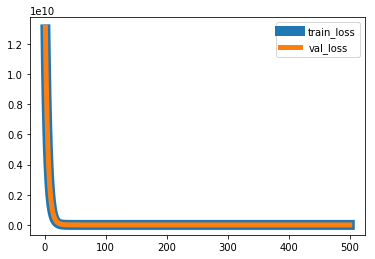

In [12]:
# 描画
x = np.arange(1, len(scr_lr.loss)+1)

plt.plot(x, scr_lr.loss, label="train_loss", linewidth=10)
plt.plot(x, scr_lr.val_loss, label="val_loss", linewidth=5)

plt.legend()
plt.show()

## lossもval_lossも収束し始めたが、val_lossは100ループくらいから値動きしなくなった。

## 【問題8】（アドバンス課題）バイアス項の除去
バイアス項 $\theta_0$ を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [13]:
scr_lr = ScratchLinearRegression(num_iter=500, 
                                 lr=0.01, 
                                 no_bias = True,
                                 verbose=True)

scr_lr.fit(X_train_scaler, y_train, X_test_scaler, y_test)

iter0:[loss]:16332235713.197973
iter0:[val_loss]:16490121431.560722
iter1:[loss]:16332235713.197968
iter1:[val_loss]:16509477140.032347
iter2:[loss]:16332235713.197968
iter2:[val_loss]:16526788642.392958
iter3:[loss]:16332235713.197964
iter3:[val_loss]:16542279473.774931
iter4:[loss]:16332235713.197964
iter4:[val_loss]:16556147977.36653
iter5:[loss]:16332235713.197964
iter5:[val_loss]:16568570204.104736
iter6:[loss]:16332235713.197964
iter6:[val_loss]:16579702476.36492
iter7:[loss]:16332235713.197964
iter7:[val_loss]:16589683653.923973
iter8:[loss]:16332235713.197958
iter8:[val_loss]:16598637136.38181
iter9:[loss]:16332235713.197958
iter9:[val_loss]:16606672632.49497
iter10:[loss]:16332235713.197958
iter10:[val_loss]:16613887723.496357
iter11:[loss]:16332235713.197964
iter11:[val_loss]:16620369244.427399
iter12:[loss]:16332235713.197952
iter12:[val_loss]:16626194504.773878
iter13:[loss]:16332235713.197958
iter13:[val_loss]:16631432367.249641
iter14:[loss]:16332235713.197952
iter14:[val

## 考察
- 結果としてlossデータで何も値動きしないようになった。
  - バイアス項がないことで、X（特徴量）とy（目的変数）間の係数の関係しか調べられない。切片も更新されないと係数＝直線関係の傾斜も更新されないということだと思います。
  - 過程の計算式を含めて考察すると、最初にランダムに決まるtheta（_linear_hypothesis)の値が更新されず、何回ループしてもXとyの直線関係しか計算されないということだと思います。
  
- 結論
  バイアス項（切片）があることで、thetaの値が更新され、最終的に適切な切片と各特徴量間の係数を求めることができ、適切な回帰直線を引くことができる。

## 【問題9】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

In [14]:
# 標準化していないX_trainとX_testを2乗・3乗して計算
X_train_2 = X_train ** 2
X_test_2 = X_test ** 2
X_train_3 = X_train ** 3
X_test_3 = X_test ** 3


In [15]:
scr_lr2 = ScratchLinearRegression(num_iter=500, 
                                 lr=0.01, 
                                 no_bias = False,
                                 verbose=True)

scr_lr2.fit(X_train_2, y_train, X_test_2, y_test)

iter0:[loss]:6.61028896330827e+37
iter0:[val_loss]:6.565009141734661e+37
iter1:[loss]:4.199612492417478e+62
iter1:[val_loss]:4.169350511158625e+62
iter2:[loss]:2.679363383032737e+87
iter2:[val_loss]:2.659956903387517e+87
iter3:[loss]:1.7101910283057716e+112
iter3:[val_loss]:1.697797631897649e+112
iter4:[loss]:1.0916349155828812e+137
iter4:[val_loss]:1.083723629985235e+137
iter5:[loss]:6.968066171907929e+161
iter5:[val_loss]:6.917566983926503e+161
iter6:[loss]:4.447821274379942e+186
iter6:[val_loss]:4.415586865228805e+186
iter7:[loss]:2.8391112553966305e+211
iter7:[val_loss]:2.8185355456669216e+211
iter8:[loss]:1.8122474501368867e+236
iter8:[val_loss]:1.7991136648158483e+236
iter9:[loss]:1.1567848269729843e+261
iter9:[val_loss]:1.148401334095652e+261
iter10:[loss]:7.383931680467317e+285
iter10:[val_loss]:7.330418583467113e+285
iter11:[loss]:inf
iter11:[val_loss]:inf
iter12:[loss]:inf
iter12:[val_loss]:inf
iter13:[loss]:inf
iter13:[val_loss]:inf
iter14:[loss]:inf
iter14:[val_loss]:inf
it

/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:179: RuntimeWarning: overflow encountered in double_scalars
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:194: RuntimeWarning: overflow encountered in double_scalars
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in subtract


In [16]:
scr_lr3 = ScratchLinearRegression(num_iter=500, 
                                 lr=0.01, 
                                 no_bias = False,
                                 verbose=True)

scr_lr3.fit(X_train_3, y_train, X_test_3, y_test)

iter0:[loss]:4.504821434256266e+57
iter0:[val_loss]:4.641010560652106e+57
iter1:[loss]:5.2032522857682434e+95
iter1:[val_loss]:5.377163592959146e+95
iter2:[loss]:6.23152383284328e+133
iter2:[val_loss]:6.444872202231301e+133
iter3:[loss]:7.53132348557672e+171
iter3:[val_loss]:7.790698034593165e+171
iter4:[loss]:9.122850579842947e+209
iter4:[val_loss]:9.437493611174878e+209
iter5:[loss]:1.1056883308748838e+248
iter5:[val_loss]:1.1438367199730324e+248
iter6:[loss]:1.3402780606314682e+286
iter6:[val_loss]:1.3865243504609071e+286
iter7:[loss]:inf
iter7:[val_loss]:inf
iter8:[loss]:inf
iter8:[val_loss]:inf
iter9:[loss]:inf
iter9:[val_loss]:inf
iter10:[loss]:inf
iter10:[val_loss]:inf
iter11:[loss]:inf
iter11:[val_loss]:inf
iter12:[loss]:inf
iter12:[val_loss]:inf
iter13:[loss]:inf
iter13:[val_loss]:inf
iter14:[loss]:inf
iter14:[val_loss]:inf
iter15:[loss]:inf
iter15:[val_loss]:inf
iter16:[loss]:nan
iter16:[val_loss]:nan
iter17:[loss]:nan
iter17:[val_loss]:nan
iter18:[loss]:nan
iter18:[val_loss]

/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:179: RuntimeWarning: overflow encountered in double_scalars
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:194: RuntimeWarning: overflow encountered in double_scalars
/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:147: RuntimeWarning: invalid value encountered in subtract


## 2乗・3乗ともに発散

## 問題10】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

$$
θj
:=
θj
−
α
\frac{1}{m}
\sum_{i=1}^{m}
[
(
hθ(x(i))
−
y(i)
)
x(i)j
]
\tag{式1}
$$

以下の式から説明をはじめることができます。

$$
θj
:=
θj
−
\frac{∂}{∂θj}
J(θ)
\tag{式2}
$$

目的関数（損失関数） $J(\theta)$ は次の式です。

$$
J(θ)
=
\frac{1}{2m}
\sum_{i=1}^{m}
(
hθ(x(i))
−
y(i))^2
\tag{式3}
$$

## 回答
- 式1のα以降の式は式3をθで微分した式。
- 式2の−以降の式は式3をθで微分した式。式1と式2は同じ式。

## 説明
目的関数(=X0θ0+X1θ1+...Xnθn)を微分することで傾きを算出することができる。傾きはθの更新（式2）により徐々に値が小さくなり、式3の目的関数も小さくなってくる=収束。最終的に目的関数を微分しても0に近い値になっていくことで式1のα以降のマイナス部分がほとんど0になり、θが更新されない＝最適解が導き出されるということである。

## 【問題11】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

## 合っているか自信はないのですが

式3の最小2乗法によって目的関数を求めているため、2乗=つまり２次式である限り、微分すると1次式になるため、1次式の上では必ず降下していくということなのではないかと思います。最小2乗法以外の目的関数の求め方をした場合（3乗4乗とするような方法？、sincosを使った方法など）、微分しても2次式3次式となるので、曲線型になり局所最適解の問題が出てきます。ということなのかと思いました。